<a href="https://colab.research.google.com/github/Khadeeja-Moin/Colab---VGG19/blob/main/ResNet/Attempt%202/ResNet_50_(brain_MRI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.layers import Flatten, Dense

In [3]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dropout

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training'
test_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Testing'

In [27]:
# re-size all the images to this because images in dataset are f varying sizes
IMAGE_SIZE = [224, 224]

In [28]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset = 'training')


Found 4571 images belonging to 4 classes.


In [30]:
validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset = 'validation')

Found 1141 images belonging to 4 classes.


In [31]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [32]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   classes=4,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

# Unfreeze the last 4 layers
for layer in pretrained_model.layers[-4:]:
    layer.trainable = True

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(32, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))

In [33]:
resnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,984,996 (286.05 MB)

 Trainable params: 52,452,004 (200.09 MB)

 Non-trainable params: 22,532,992 (85.96 MB)

In [34]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
epochs=20

history = resnet_model.fit(
  training_set,
  validation_data=validation_set,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 115s 700ms/step - accuracy: 0.4842 - loss: 4.0455 - val_accuracy: 0.4978 - val_loss: 3.5254
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 92s 617ms/step - accuracy: 0.6925 - loss: 0.7543 - val_accuracy: 0.5697 - val_loss: 1.3131
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 91s 614ms/step - accuracy: 0.7063 - loss: 0.7093 - val_accuracy: 0.5136 - val_loss: 1.5080
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 93s 633ms/step - accuracy: 0.7159 - loss: 0.7069 - val_accuracy: 0.2936 - val_loss: 3.4330
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 91s 613ms/step - accuracy: 0.7477 - loss: 0.6136 - val_accuracy: 0.5784 - val_loss: 1.3015
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 93s 628ms/step - accuracy: 0.7602 - loss: 0.5910 - val_accuracy: 0.3918 - val_loss: 1.7885
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 91s 614ms/step - accuracy: 0.7658 - loss: 0.5568 - val_accuracy: 0.7108 - val_loss: 0.7393
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 142s 612ms/step - accuracy: 0.7631 - loss: 0.5753 - v

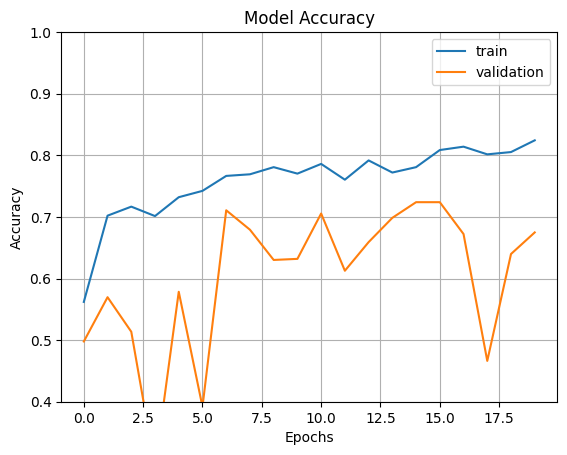

In [36]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

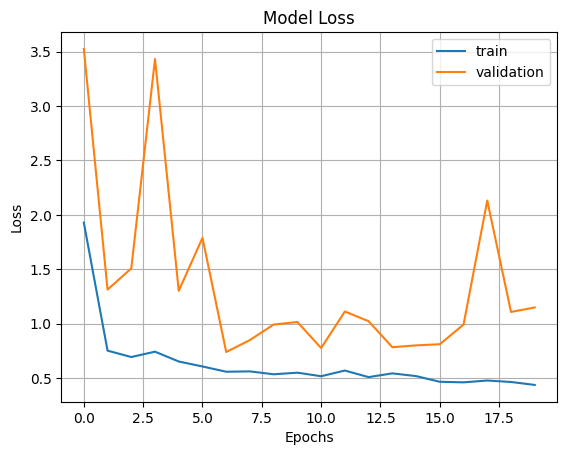

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [38]:
# Evaluate the model on the test set
test_loss, test_accuracy = resnet_model.evaluate(test_set)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - accuracy: 0.7084 - loss: 0.9234
Test Loss: 0.8946856260299683
Test Accuracy: 0.7063310742378235


In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [40]:
def get_labels_and_predictions(generator, model):
    true_labels = []
    predictions = []

    # Iterate over the generator
    for i in range(len(generator)):
        x_batch, y_batch = generator[i]
        y_pred = model.predict(x_batch)

        true_labels.extend(np.argmax(y_batch, axis=1))  # Assuming y_batch is one-hot encoded
        predictions.extend(np.argmax(y_pred, axis=1))

    return np.array(true_labels), np.array(predictions)


In [41]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

In [42]:
# Get true labels and predictions for the training set
true_labels_train, predictions_train = get_labels_and_predictions(training_set, resnet_model)

# Get true labels and predictions for the test set
true_labels_test, predictions_test = get_labels_and_predictions(test_set, resnet_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━

In [44]:
# Compute the confusion matrices
cm_train = confusion_matrix(true_labels_train, predictions_train)
cm_test = confusion_matrix(true_labels_test, predictions_test)

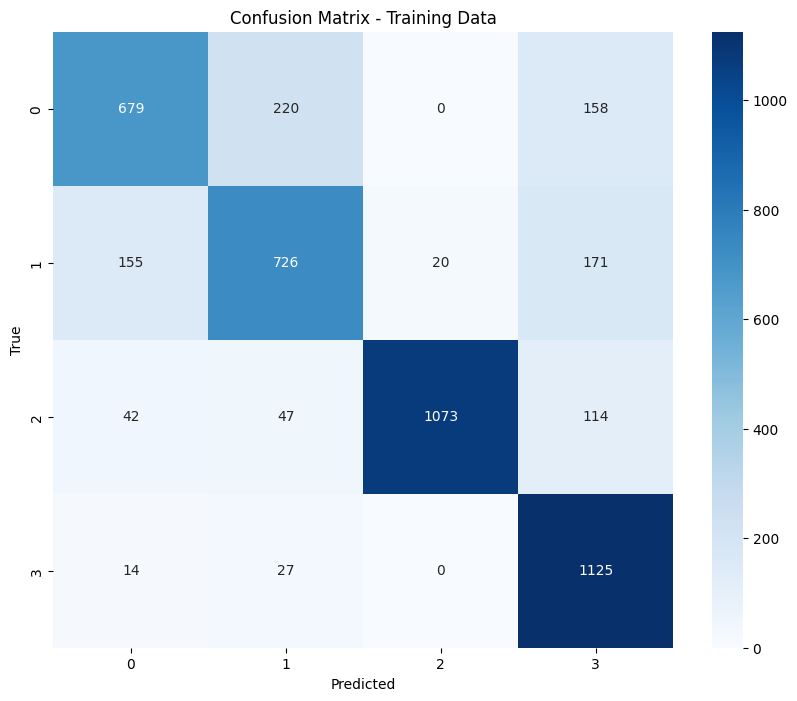

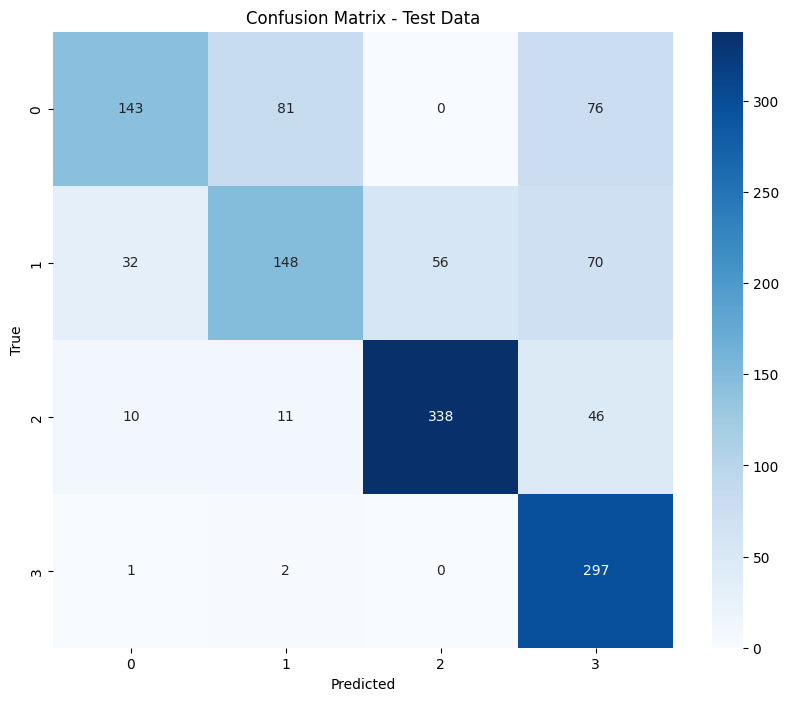

In [45]:
# Plot the confusion matrices
plot_confusion_matrix(cm_train, title='Confusion Matrix - Training Data')
plot_confusion_matrix(cm_test, title='Confusion Matrix - Test Data')

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [47]:
# For training data
precision_train = precision_score(true_labels_train, predictions_train, average='weighted')
recall_train = recall_score(true_labels_train, predictions_train, average='weighted')
f1_train = f1_score(true_labels_train, predictions_train, average='weighted')

print(f'Training Precision: {precision_train}')
print(f'Training Recall: {recall_train}')
print(f'Training F1 Score: {f1_train}')

# For test data
precision_test = precision_score(true_labels_test, predictions_test, average='weighted')
recall_test = recall_score(true_labels_test, predictions_test, average='weighted')
f1_test = f1_score(true_labels_test, predictions_test, average='weighted')

print(f'Test Precision: {precision_test}')
print(f'Test Recall: {recall_test}')
print(f'Test F1 Score: {f1_test}')

Training Precision: 0.8004039166685061
Training Recall: 0.7882301465762416
Training F1 Score: 0.7868640660507342
Test Precision: 0.7226779514405008
Test Recall: 0.7063310450038138
Test F1 Score: 0.6943834564173775
